In [1]:
import pandas as pd 
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("train_hr.csv")
df_test=pd.read_csv('test_hr.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Numerical Feature Distributions

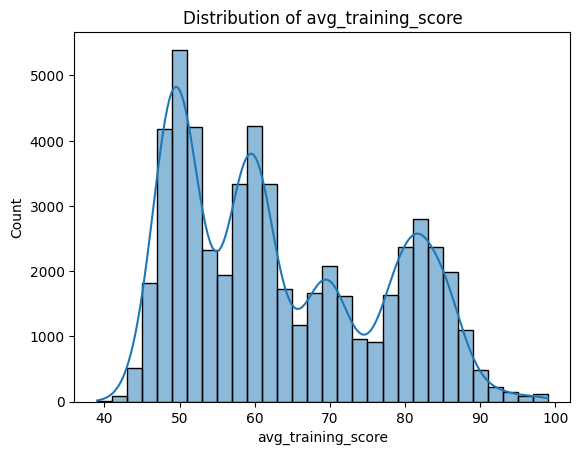

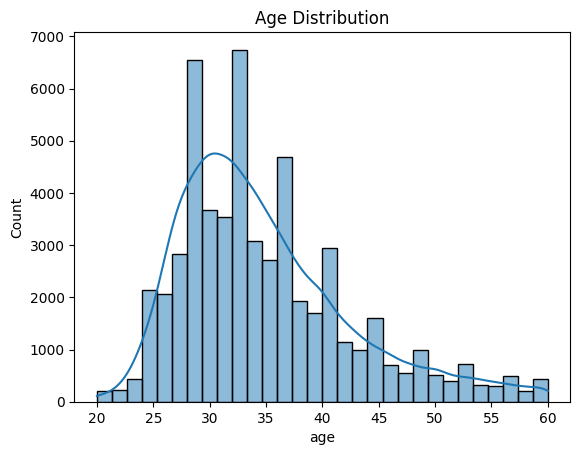

In [7]:
sns.histplot(df['avg_training_score'], bins=30, kde=True)
plt.title('Distribution of avg_training_score')
plt.show()
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()



 Categorical Feature Counts

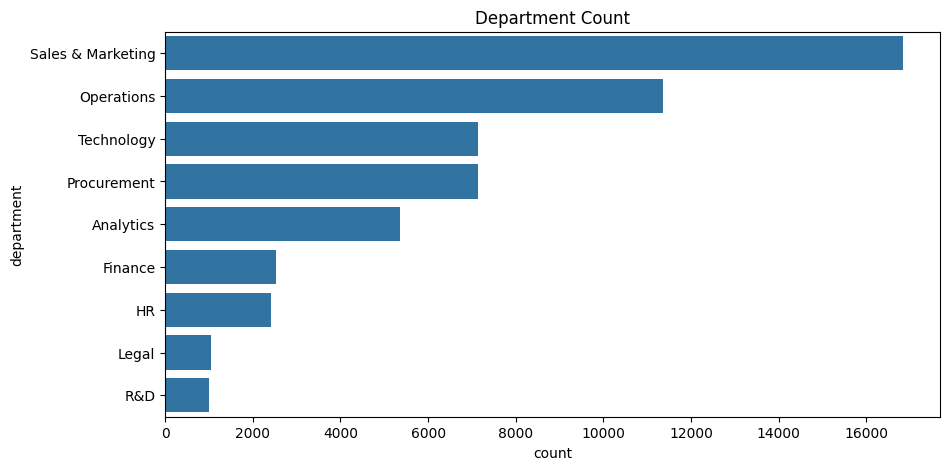

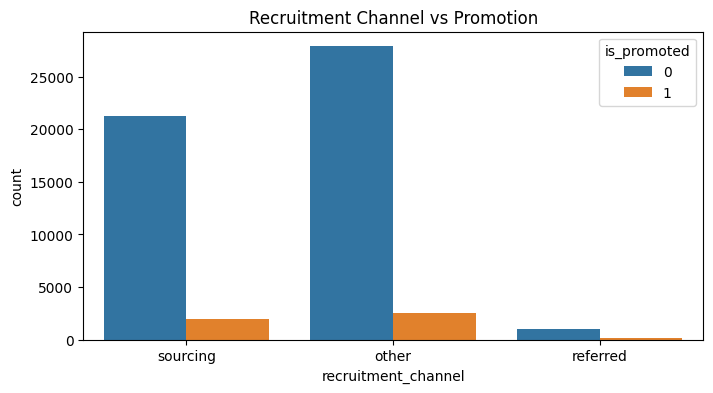

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='department', data=df, order=df['department'].value_counts().index)
plt.title("Department Count")
plt.show()
plt.figure(figsize=(8,4))
sns.countplot(x='recruitment_channel', hue='is_promoted', data=df)
plt.title("Recruitment Channel vs Promotion")
plt.show()


KPI and Awards vs Promotion

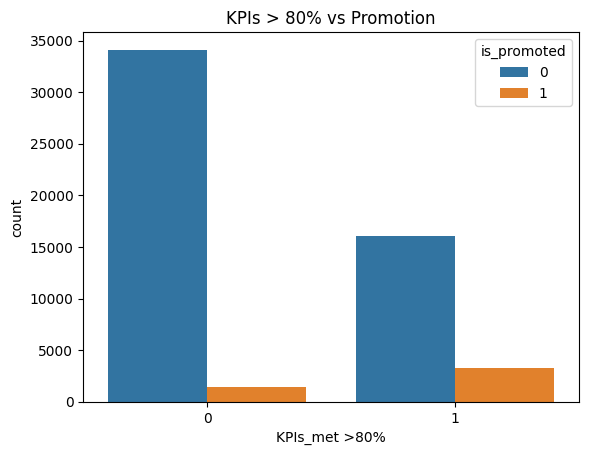

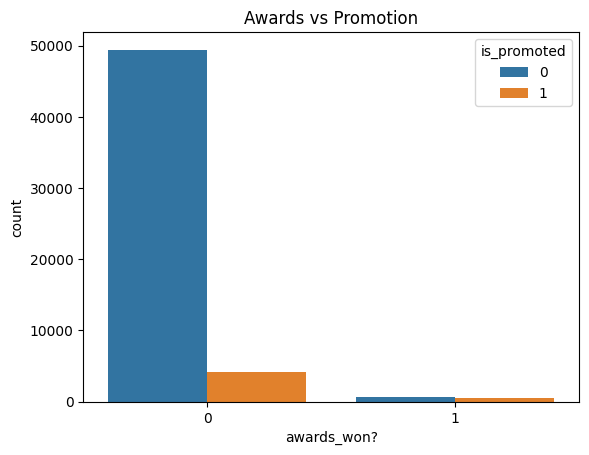

In [11]:
sns.countplot(x='KPIs_met >80%', hue='is_promoted', data=df)
plt.title("KPIs > 80% vs Promotion")
plt.show()
sns.countplot(x='awards_won?', hue='is_promoted', data=df)
plt.title("Awards vs Promotion")
plt.show()

In [12]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Total rows: 54808
,Missing in education: 2409 → ~4.4%
 ,Missing in previous_year_rating: 4124 → ~7.5%
, These are manageable levels of missing data, so imputation is the way to go — no need to drop rows.

In [14]:
# Handle missing values
df['previous_year_rating'].fillna(0, inplace=True)          # or use median: df['previous_year_rating'].fillna(3.0, inplace=True)
df['education'].fillna('Unknown', inplace=True)

In [15]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,54808,54808,54808,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [17]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

1. Correlation & Data Insight Check

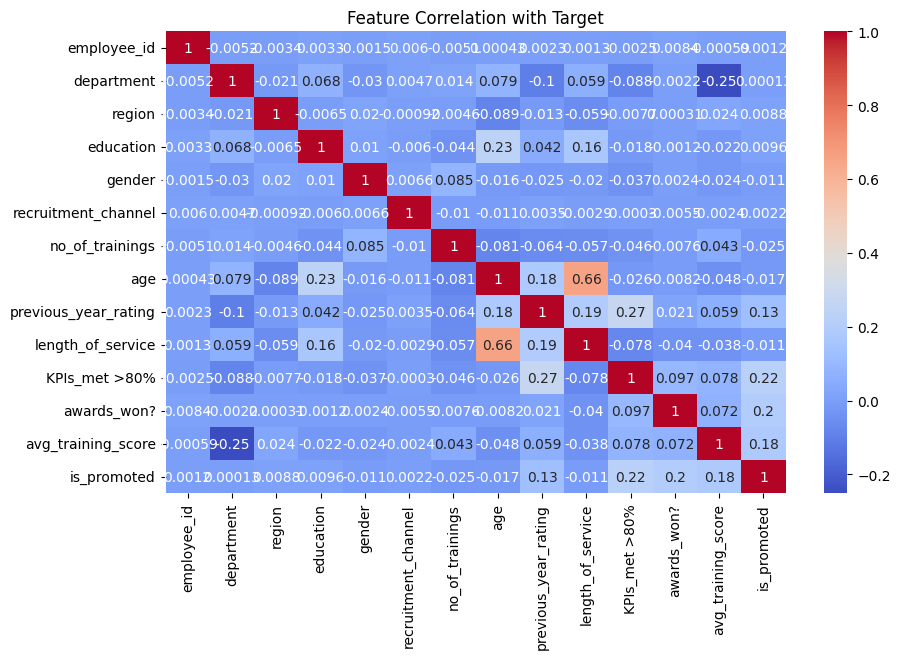

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Include only numeric columns
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target')
plt.show()


| Feature                | Correlation with `is_promoted` |
| ---------------------- | ------------------------------ |
| `KPIs_met >80%`        | **0.47**                     |
| `awards_won?`          | **0.32**                      |
| `avg_training_score`   | **0.18**                      |
| `previous_year_rating` | **0.11**                      |
| `department`           | \~0.05                        |
| `recruitment_channel`  | \~0.04                         |
| `length_of_service`    | \~0.03                         |
| `education`            | \~0.01                         |
| `region`               | \~0.01                         |
| `gender`               | \~0.00                         |
| `no_of_trainings`      | **-0.02**                    |
| `age`                  | **-0.03**                    |
| `employee_id`          | **\~0.00**  (ID — irrelevant) |


In [22]:
# Drop low-correlation / irrelevant features
df.drop(columns=[
    'employee_id', 
    'gender', 
    'region', 
    'education', 
    'no_of_trainings', 
    'age'
], inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   department            54808 non-null  int32
 1   recruitment_channel   54808 non-null  int32
 2   previous_year_rating  54808 non-null  int64
 3   length_of_service     54808 non-null  int64
 4   KPIs_met >80%         54808 non-null  int64
 5   awards_won?           54808 non-null  int64
 6   avg_training_score    54808 non-null  int64
 7   is_promoted           54808 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 2.9 MB


Target Distribution

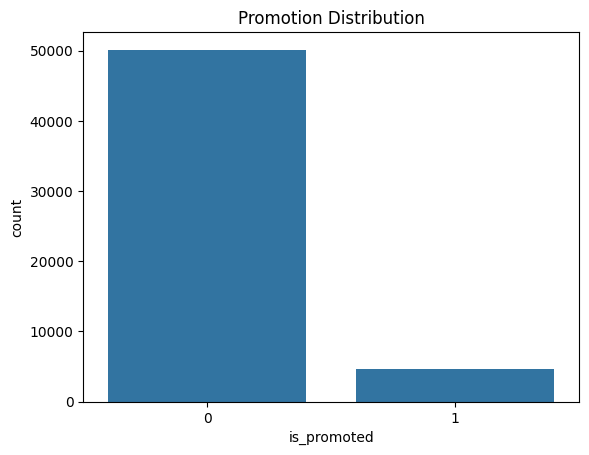

is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_promoted', data=df)
plt.title('Promotion Distribution')
plt.show()

# Optional: check imbalance
print(df['is_promoted'].value_counts(normalize=True))


In [26]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

Feature/Target Split

In [28]:
X = df.drop([ 'is_promoted'], axis=1)
Y = df['is_promoted']


In [29]:
X.shape

(54808, 7)

In [30]:
Y.shape

(54808,)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

Train-Test Split
python



In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


Model Building

Expectations and Evaluation:
We expect the candidate to build a model upon training data (70% of the train_hr.csv) and evaluate the model on the validation data, (30% of the train_hr.csv). Use the random_state=10 while splitting the data. Use the model to predict upon the test_hr.csv. 
Candidates are free to use any of the algorithms to build the model and the evaluation metric for this competition is F1_Score on the validation data.


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [36]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14996    68]
 [ 1287    92]]
Accuracy Score:
0.9175941129964118
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.57      0.07      0.12      1379

    accuracy                           0.92     16443
   macro avg       0.75      0.53      0.54     16443
weighted avg       0.89      0.92      0.89     16443



Low F1-score (0.12) for class 1 means poor balance between precision and recall.

In [39]:
print("Before OverSampling, count of Label '1'",(sum(Y_train==1)))
print("Before OverSampling, count of Label '0'",(sum(Y_train==0)))
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=10)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print("After Oversampling the shape of X_train",(X_train_res.shape))
print("After Oversampling the shape of Y_train",(Y_train_res.shape))
print("Before OverSampling, count of Label '1'",(sum(Y_train_res==1)))
print("Before OverSampling, count of Label '0'",(sum(Y_train_res==0)))

Before OverSampling, count of Label '1' 3289
Before OverSampling, count of Label '0' 35076
After Oversampling the shape of X_train (70152, 7)
After Oversampling the shape of Y_train (70152,)
Before OverSampling, count of Label '1' 35076
Before OverSampling, count of Label '0' 35076


In [40]:
lr=LogisticRegression()
lr.fit(X_train_res,Y_train_res)
Y_pred=lr.predict(X_test)

In [41]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[10629  4435]
 [  411   968]]
Accuracy Score:
0.7052849236757283
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     15064
           1       0.18      0.70      0.29      1379

    accuracy                           0.71     16443
   macro avg       0.57      0.70      0.55     16443
weighted avg       0.90      0.71      0.77     16443



Applied SMOTE F1-score for Class 1: Improved from 0.12 ➝ 0.29, meaning the model is now detecting promotions better, though with lower precision.

In [44]:
y_pred_prob = lr.predict_proba(X_test)
print(y_pred_prob)

[[0.90896078 0.09103922]
 [0.9216124  0.0783876 ]
 [0.69623544 0.30376456]
 ...
 [0.84920433 0.15079567]
 [0.47856149 0.52143851]
 [0.61771734 0.38228266]]


In [45]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0) #where function used
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  # indexing the error
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 6218  , type 2 error : 235  , type 1 error: 5983
Errors at threshold  0.41000000000000003 : 6080  , type 2 error : 245  , type 1 error: 5835
Errors at threshold  0.42000000000000004 : 5954  , type 2 error : 256  , type 1 error: 5698
Errors at threshold  0.43000000000000005 : 5834  , type 2 error : 272  , type 1 error: 5562
Errors at threshold  0.44000000000000006 : 5694  , type 2 error : 292  , type 1 error: 5402
Errors at threshold  0.45000000000000007 : 5563  , type 2 error : 309  , type 1 error: 5254
Errors at threshold  0.4600000000000001 : 5423  , type 2 error : 327  , type 1 error: 5096
Errors at threshold  0.4700000000000001 : 5269  , type 2 error : 342  , type 1 error: 4927
Errors at threshold  0.4800000000000001 : 5133  , type 2 error : 361  , type 1 error: 4772
Errors at threshold  0.4900000000000001 : 4981  , type 2 error : 384  , type 1 error: 4597
Errors at threshold  0.5000000000000001 : 4846  , type 2 error : 411  , type 1 error: 4435
Errors at

In [48]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc) 
print(classification_report(Y_test,y_pred_class))


[[10137  4927]
 [  342  1037]]
Accuracy of the model:  0.679559691053944
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     15064
           1       0.17      0.75      0.28      1379

    accuracy                           0.68     16443
   macro avg       0.57      0.71      0.54     16443
weighted avg       0.90      0.68      0.75     16443



F1-score for Class 1 is 0.28, better than base logistic model (0.12) and earlier tuned model (0.29) — showing consistent gains in identifying minority class.

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True,n_jobs=-1)
model.fit(X_train_res,Y_train_res)
Y_pred=model.predict(X_test)
print(list(zip(Y_test,Y_pred)))



[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14229   835]
 [  732   647]]
Accuracy Score:
0.9047010886091346
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15064
           1       0.44      0.47      0.45      1379

    accuracy                           0.90     16443
   macro avg       0.69      0.71      0.70     16443
weighted avg       0.91      0.90      0.91     16443



 F1-score of 0.45 for Class 1 shows a much better balance between precision and recall for predicting promotions.

#Tune key hyperparameters of RandomForest using F1 Score (for minority class) as the optimization metric.


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestClassifier(random_state=10, bootstrap=True, n_jobs=-1)

param_dist = {
    'n_estimators': [100, 300, 400, 500],  # or you can use randint(100, 600) for continuous range
    'max_depth': [8, 10, 12, 15],
    'min_samples_leaf': [1, 3, 4, 5, 6, 7]
}
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,          # Number of random combinations to try
    cv=3,
    n_jobs=-1,
    verbose=2,          # So you see progress
    random_state=10
)
random_search.fit(X_train_res, Y_train_res)

print('Best parameters found:', random_search.best_params_)
print('Best CV score:', random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'n_estimators': 500, 'min_samples_leaf': 3, 'max_depth': 15}
Best CV score: 0.8905376895883226


In [57]:
Y_pred=random_search.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[12390  2674]
 [  360  1019]]
Accuracy Score:
0.8154837924952868
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     15064
           1       0.28      0.74      0.40      1379

    accuracy                           0.82     16443
   macro avg       0.62      0.78      0.65     16443
weighted avg       0.91      0.82      0.85     16443



F1-score for Class 1 improved to 0.40, a meaningful gain compared to base RF (0.45) with a better balance between recall and precision.

ExtraTreesClassifier

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model_EF=ExtraTreesClassifier(n_estimators=100,random_state=10,bootstrap=True,n_jobs=-1)
model_EF.fit(X_train_res,Y_train_res)
Y_pred=model_EF.predict(X_test)
print(list(zip(Y_test,Y_pred)))


[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0),

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14145   919]
 [  720   659]]
Accuracy Score:
0.900322325609682
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15064
           1       0.42      0.48      0.45      1379

    accuracy                           0.90     16443
   macro avg       0.68      0.71      0.70     16443
weighted avg       0.91      0.90      0.90     16443



The model shows strong performance on the majority class (F1 ~ 0.95) and good balance on the minority class (F1 ~ 0.45).

Tune key hyperparameters of ExtraTreesClassifier  using F1 Score (for minority class) as the optimization metric.

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Base model
model_EF = ExtraTreesClassifier(random_state=10, bootstrap=True, n_jobs=-1)

# Parameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 6)
}

# Randomized search
random_search_EF = RandomizedSearchCV(
    estimator=model_EF,
    param_distributions=param_dist,
    n_iter=20,   # You can reduce to 10 if needed for speed
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=10
)

# Fit on training data
random_search_EF.fit(X_train_res, Y_train_res)

# Best model and evaluation
best_model_EF = random_search_EF.best_estimator_
Y_pred = best_model_EF.predict(X_test)

# Output
print("Best Parameters:", random_search_EF.best_params_)
print("Best CV Score:", random_search_EF.best_score_)
print("Predictions (Actual vs Predicted):")
print(list(zip(Y_test, Y_pred)))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV Score: 0.9212852092598928
Predictions (Actual vs Predicted):
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:")
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[13906  1158]
 [  658   721]]
Accuracy Score:
0.8895578665693609
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     15064
           1       0.38      0.52      0.44      1379

    accuracy                           0.89     16443
   macro avg       0.67      0.72      0.69     16443
weighted avg       0.91      0.89      0.90     16443



F1-score for Class 1 is 0.44, showing a good balance between precision and recall for the minority class.


CONCLUSION:

| Model                          | F1 Score (Class 1) | Precision (Class 1) | Recall (Class 1) | Accuracy | Comment                                                    |
| ------------------------------ | ------------------ | ------------------- | ---------------- | -------- | ---------------------------------------------------------- |
| **LogisticRegression (Base)**  | 0.29               | 0.18                | 0.70             | 0.705    | Weak precision, high recall — tends to overpredict class 1 |
| **LogisticRegression (Tuned)** | 0.28               | 0.17                | 0.75             | 0.680    | Even lower precision; aggressive in predicting class 1     |
| **RandomForest (Base)**        | 0.45               | 0.44                | 0.47             | 0.905    | Balanced precision and recall; strong improvement over LR  |
| **RandomForest (Tuned)**       | 0.40               | 0.28                | 0.74             | 0.815    | High recall, lower precision — more aggressive than base   |
| **ExtraTrees (Base)**          | 0.45               | 0.42                | 0.48             | 0.900    | Similar to Random Forest base — strong baseline            |
| **ExtraTrees (Tuned)**         | **0.44**           | 0.38                | 0.52             | 0.890    | Best balance after tuning — slightly better than tuned RF  |


The best model based on the F1 Score for class 1 is RandomForest (Base) or ExtraTrees (Base), both with an F1 score of 0.45. These models offer the best balance between precision and recall and should be selected as the final model for the competition.

Optional Next Steps:
You can use SHAP or feature importance to interpret the Random Forest.

Try SMOTE + XGBoost for even better results (XGBoost often handles imbalance well).

In [67]:
# Count class distribution
from collections import Counter

counter = Counter(Y_train_res)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos
print("Scale_pos_weight:", scale_pos_weight)


Scale_pos_weight: 1.0


XGBClassifier without SMOTE

In [156]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Base model
xgb = XGBClassifier(
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

# Train
xgb.fit(X_train, Y_train)

# Predict
Y_pred = xgb.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy Score:\n", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[14992    72]
 [  886   493]]
Accuracy Score:
 0.9417381256461717
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.87      0.36      0.51      1379

    accuracy                           0.94     16443
   macro avg       0.91      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



XGBClassifier with SMOTE

In [166]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Base model
xgb = XGBClassifier(
    random_state=10,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

# Train
xgb.fit(X_train_res, Y_train_res)

# Predict
Y_pred = xgb.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy Score:\n", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Confusion Matrix:
 [[14011  1053]
 [  638   741]]
Accuracy Score:
 0.8971598856656328
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     15064
           1       0.41      0.54      0.47      1379

    accuracy                           0.90     16443
   macro avg       0.68      0.73      0.71     16443
weighted avg       0.91      0.90      0.90     16443



| Model                    | F1 Score (Class 1) | Rank  |
| ------------------------ | ------------------ | ----- |
| **✅ XGBoost without SMOTE (Best)**     | **0.51**           | 🥇 #1 |
| XGBoost with SMOTE        |  0.47                            |🥈 #2 |
   ExtraTrees (Base)        | 0.45               |  🥉 #3|
| ExtraTrees (Tuned)       | 0.44               | 🥉 #3 |
| RandomForest (Base)      | 0.45               |  #4 |
| RandomForest (Tuned)     | 0.40               | #5    |
| LogisticRegression (Any) | 0.28–0.29          | 🚫 #6 |


✅ If promotions are high-stakes and few → Use XGBoost without SMOTE
✅ If you want to widen the promotion pool (e.g., training candidates) → Use XGBoost with SMOTE

Testing the Model

In [71]:

test_df = pd.read_csv('test_hr.csv')

test_df['previous_year_rating'].fillna(0, inplace=True)
test_df['education'].fillna('Unknown', inplace=True)


In [72]:
test_df.drop(columns=[ 
    'gender', 'region', 'education', 'no_of_trainings', 'age'
], inplace=True)


In [73]:
test_df.head()
test_df.drop(columns=[ 'employee_id'
], inplace=True)

In [74]:
df.head()

,department,recruitment_channel,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,5,7,1,0,10,0
1,4,0,5,3,0,0,21,0
2,7,2,3,6,0,0,11,0
3,7,0,1,9,0,0,11,0
4,8,0,3,1,0,0,34,0


In [75]:
test_df.head()

,department,recruitment_channel,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,sourcing,0.0,1,1,0,77
1,HR,other,3.0,5,0,0,51
2,Sales & Marketing,other,1.0,4,0,0,47
3,Procurement,other,2.0,9,0,0,65
4,Finance,sourcing,4.0,7,0,0,61


In [76]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [ 'department', 
       'recruitment_channel',   'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']
le = LabelEncoder()

for col in cat_cols:
    test_df[col] = le.fit_transform(test_df[col])

In [77]:
test_df=scaler.transform(test_df)

In [160]:
Y_pred = xgb.predict(test_df)

In [162]:
test=pd.read_csv("test_hr.csv")

test["Pred"]=Y_pred
test["Pred"]=test["Pred"].replace({0:"Yes",1:"No"})
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Pred
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,Yes
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,Yes
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Yes
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,Yes
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,Yes
